In [1]:
%matplotlib widget
import warnings
import inspect
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from Daniel.my_LP import quantise
from Daniel.my_DWT import *

In [2]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [3]:
h1 = np.array([-1, 2, 6, 2, -1])/8
h2 = np.array([-1, 2, -1])/4
g1 = np.array([1, 2, 1])/2
g2 = np.array([-1, -2, 6, -2, -1])/4

rms_ref: 5.319223348039854
step: 11.464646464646464
CR: 4.146892484805908
bits: 53421.1656310753
rms: 6.3026743409031285
rms_ref: 6.761058179469041
step: 12.03030303030303
CR: 4.776447295270763
bits: 42991.152205799
rms: 7.578290681824528


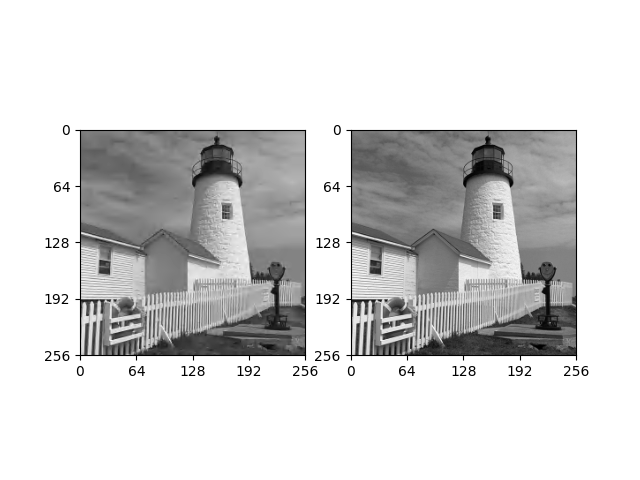

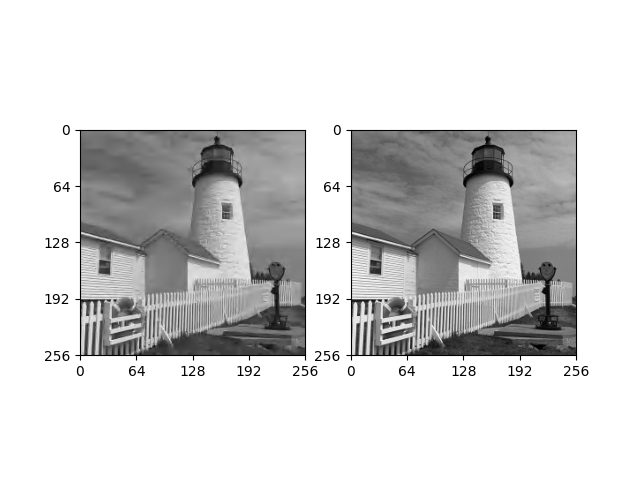

In [4]:
# Zl = DWT_analysis(lighthouse, 6, h1, h2, g1, g2, plot = True, qrise=0.5, strength=0.0)
Zl = DWT_analysis(lighthouse, 6, h1, h2, g1, g2, plot = True, qrise=0.7, strength=0.1)
Zl = DWT_analysis(lighthouse, 7, h1, h2, g1, g2, plot = True, qrise=1, strength=0.15)

rms_ref: 6.288166795762568
step: 6.9393939393939394
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
-129
0
0
-4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-4
-6
0
0
12
-8
0
0
0
0
0
0
0
0
0
4
0
6
12
-17
0
0
0
0
0
0
0
0
0
0
11
-6
15
0
-8
0
0
0
0
-26
0
26
-12
0
0
-33
0
0
0
30
0
0
0
0
0
0
0
12
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12
0
0
0
0
7
0
0
0
0
0
0
0
0
0
0
-30
8
0
0
-26
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-19
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-9
0
0
0
0
0
-12
0
26
0
12
19
0
0
0
0
-9
0
0
9
0
0
0
0
12
0
0
0
0
0
0
0
-9
0
0
0
0
0
0
0
0
0
0
0
12
0
0
0
0
9
0
0
0
0
0
0
0
0
0
12
0
0
0
0
0
0
0
0
0
0
0
0
0
-12
0
0
0
0
0
0
0
0
0
0
0
Bits for coded image = 111613
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


<ipython-input-6-5f31f4db93f6>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


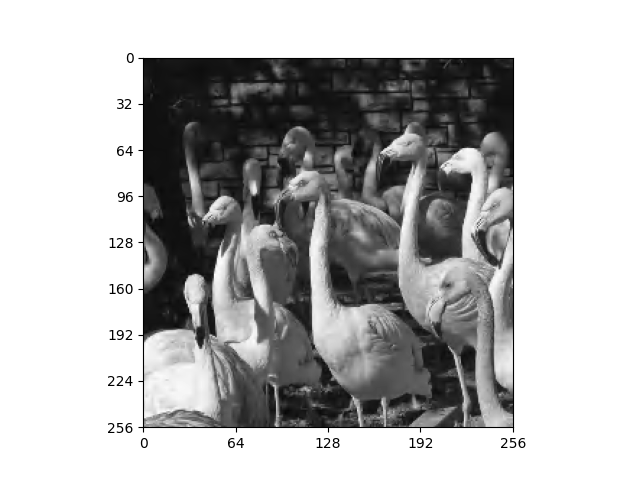

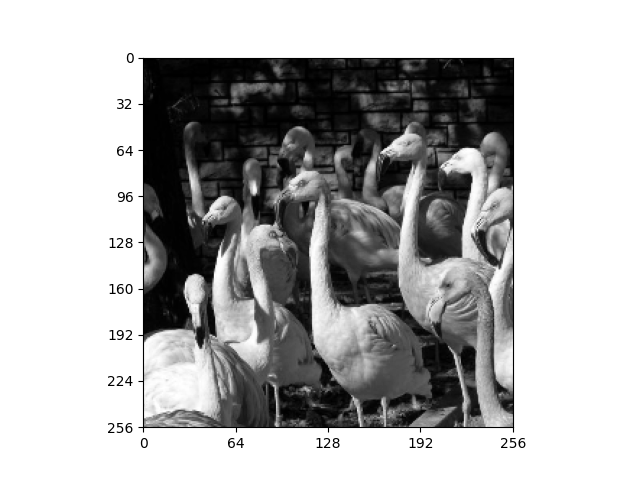

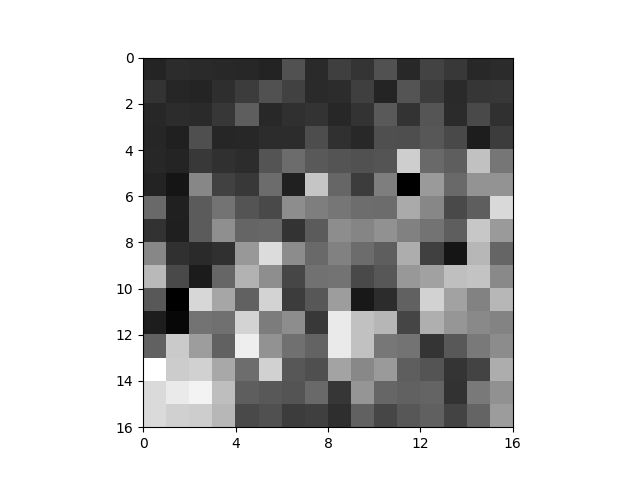

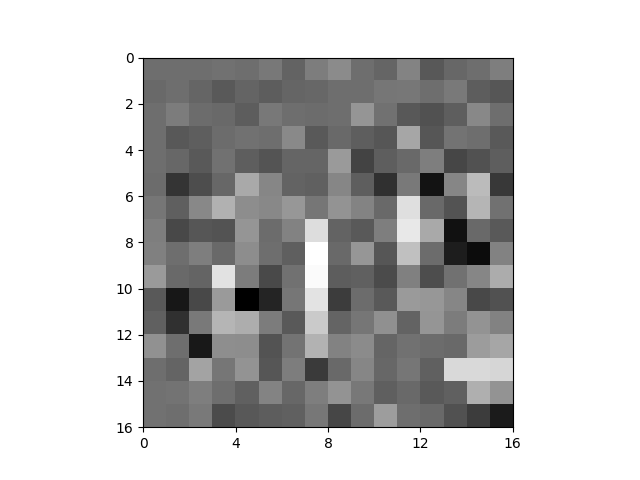

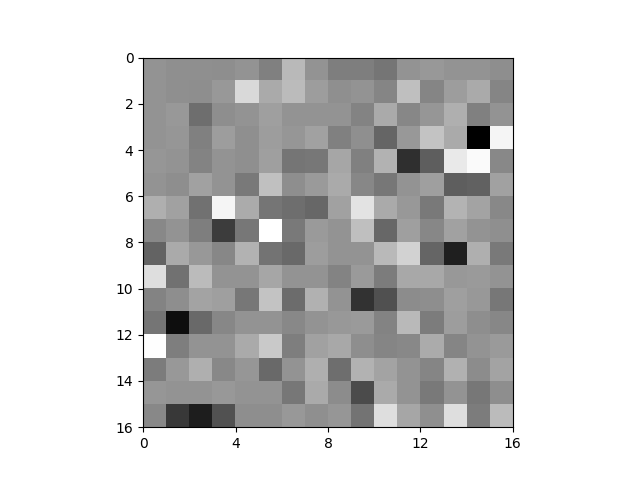

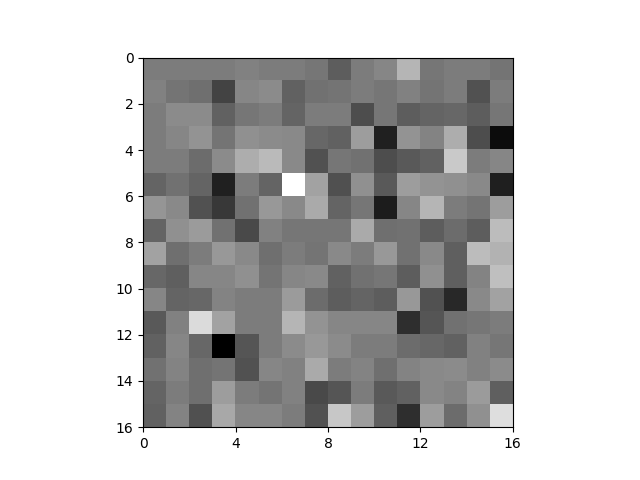

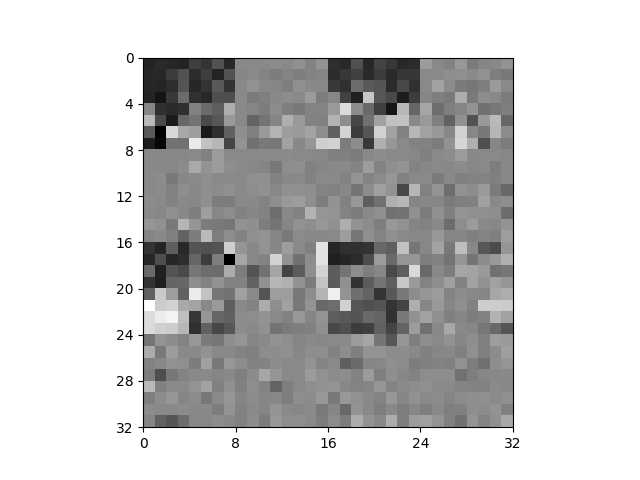

In [6]:
from cued_sf2_lab.jpeg import dwtgroup
from huffman import DWT_huffenc, DWT_huffdec

Yq, _ = DWT_quant(flamingo, 4, h1, h2, g1, g2, qrise = 1.3, strength=0)
fig, ax = plt.subplots()
plot_image(inverse_DWT(Yq, 4, g1, g2), ax=ax)
fig, ax = plt.subplots()
plot_image(flamingo, ax=ax)
vlc, header = DWT_huffenc(Yq, N=4, dcbits=16, opthuff=True)
Z = DWT_huffdec(vlc, N=4, hufftab=header, dcbits=16)
fig, ax = plt.subplots()
plot_image(dwtgroup(Yq[:32, :32], 4), ax=ax)

rms_ref: 8.859943275584582
step: 7.505050505050505
CR: 3.156853026493551
bits: 65686.78950304235
rms: 10.611766255909284
rms_ref: 4.803558992381568
step: 8.919191919191919
CR: 3.0885949557027943
bits: 77830.27239691107
rms: 9.969150810698693
rms_ref: 4.803558992381568
step: 12
CR: 4.069831521104063
bits: 59065.390171449166
rms: 11.782944559568902


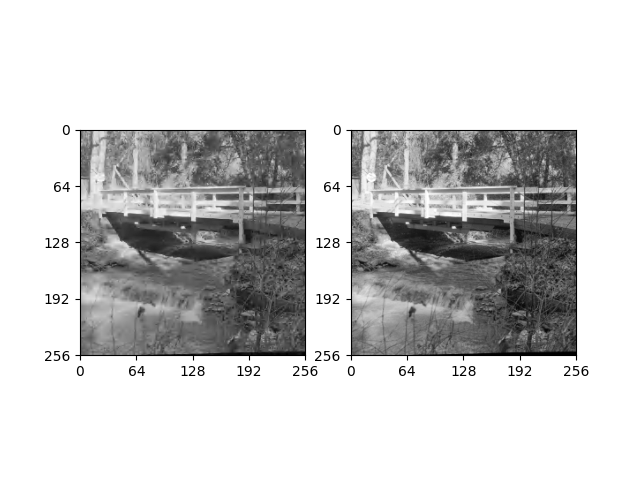

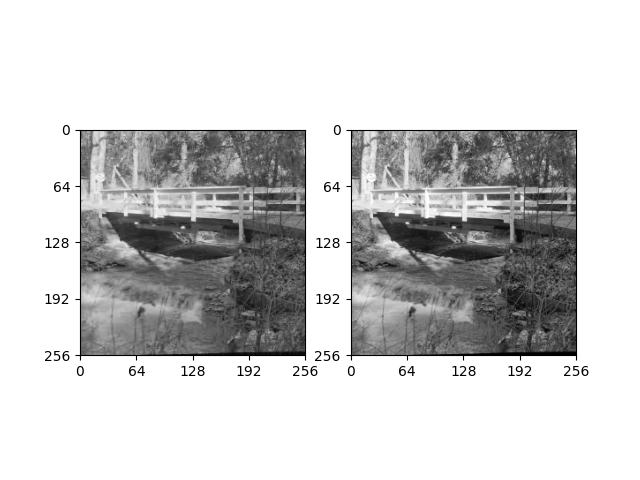

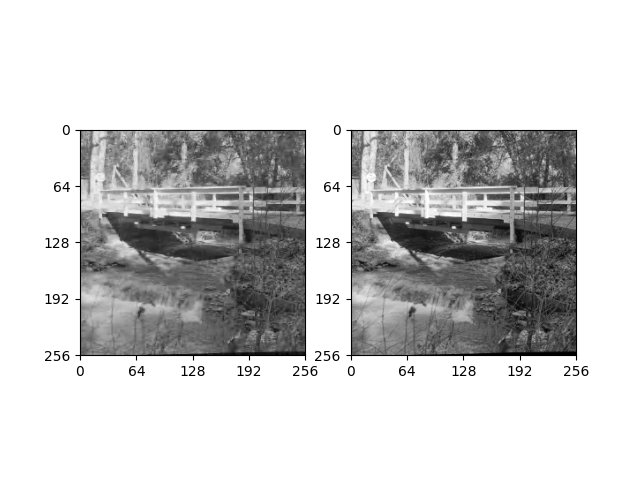

In [4]:
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=1.5, strength=0)
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.5)
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, step = 12, plot = True, qrise=0.2, strength=0.5)

rms_ref: 4.992109372773084
step: 10.191919191919192
CR: 4.508024668248755
bits: 55023.7943557028
rms: 8.918225839678103


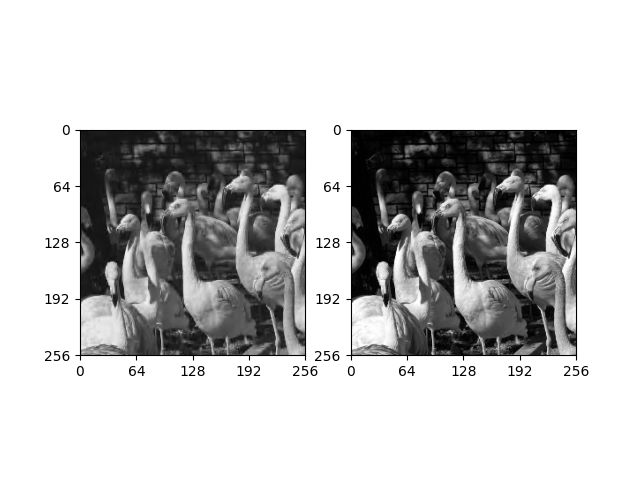

In [5]:
Zf = DWT_analysis(flamingo, 6, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.3)

In [9]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen, runampl, diagscan)